In [13]:
import xarray as xr 
import numpy as np
import glob
import matplotlib.pyplot as plt
from downloader import dataprocessing

In [64]:
def get_final_data(obs_file,rcp45_file):
    obs_data = xr.open_dataarray(obs_file)
    obs_df = dataprocessing.da_to_df(obs_data)
    end_time = obs_df.index[len(obs_df.index)-1]
    start_time = obs_df.index[0]
    

    rcp45_data = xr.open_dataarray(rcp45_file)
    rcp45_data_trim = rcp45_data.sel(time=slice(start_time , end_time))
    rcp45_df = dataprocessing.da_to_df(rcp45_data_trim)
    
    city_name = obs_file.partition(path)[-1][:-8]
    return obs_df, rcp45_df, city_name

In [65]:
# Get file name
path = '../data/riskindex/netcdf/max_temperature/'
observed_files = glob.glob(path+'*ERAI*')
rcp45_files =glob.glob(path+'*rcp45*')
rcp85_files =glob.glob(path+'*rcp85*')

observed_files.sort()
rcp45_files.sort()


In [46]:
# city_names = []
# for i in range(len(observed_files)):
#     city_names.append(observed_files[i].partition(path)[2][:-8])
    
# city_names

- import data
- select end date from observed dataset
- trim model dataset by time
- plot

In [66]:
def plot_city_data(obs_df, model_df, city_name):
    fig ,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,5))
    ax1.hist(obs_df.data)
    ax1.set_title(f"{city_name} observed (ERA Interim)")
    ax1.set_xlabel("Temperature /K")
    ax2.hist(model_df.data)
    ax2.set_title(f"{city_name} GCM (RCP 4.5)")
    ax2.set_xlabel("Temperature /K")
    plt.show()

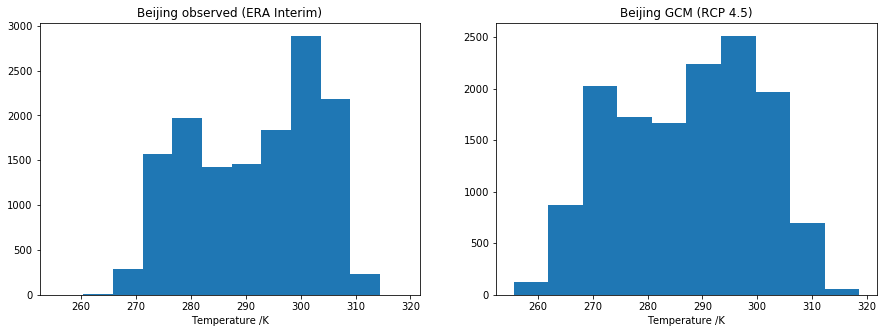

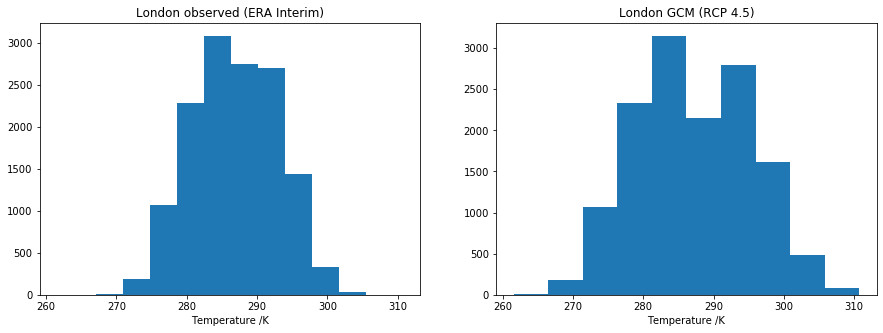

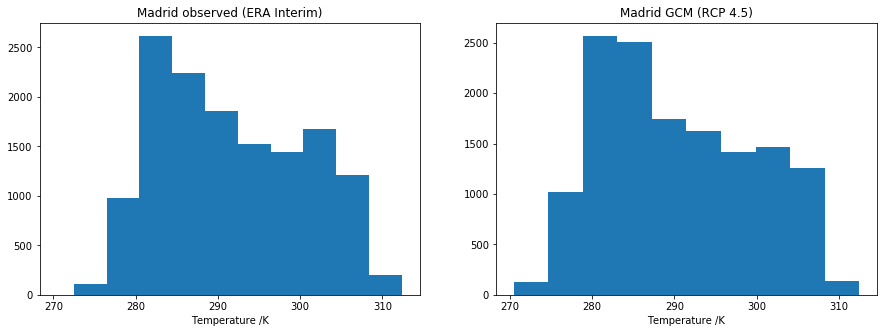

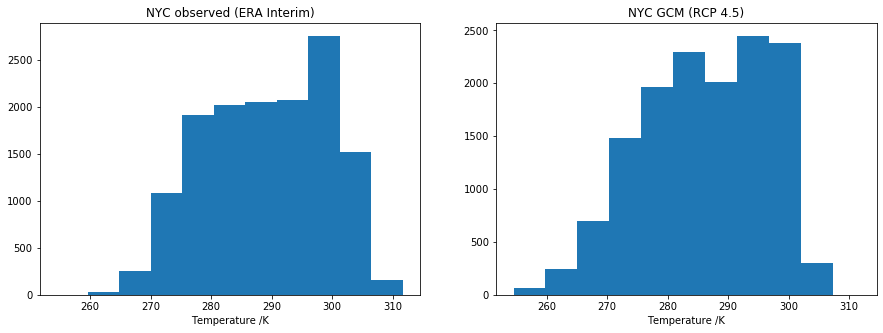

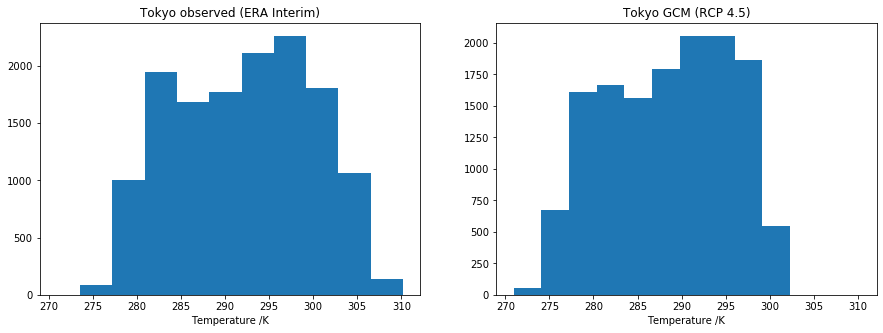

In [67]:
for i in range(len(observed_files)):
    obs_df, rcp45_df, city_name = get_final_data(observed_files[i],rcp45_files[i])
    plot_city_data(obs_df, rcp45_df, city_name)